In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from sys import platform
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def smooth(a, kernel):
    b=np.convolve(a,kernel,'same')/np.convolve(np.ones(a.shape),kernel,'same')
    return b

In [3]:
vol_file = Path('analysis_sections_based_on_swim_pattern.csv')
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')
sigma=20;
short_kernel=(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(np.arange(-60,61)**2)/(2*sigma**2))

In [4]:
from activity_swim_bout import *

Processing 03152018 Fish1-1


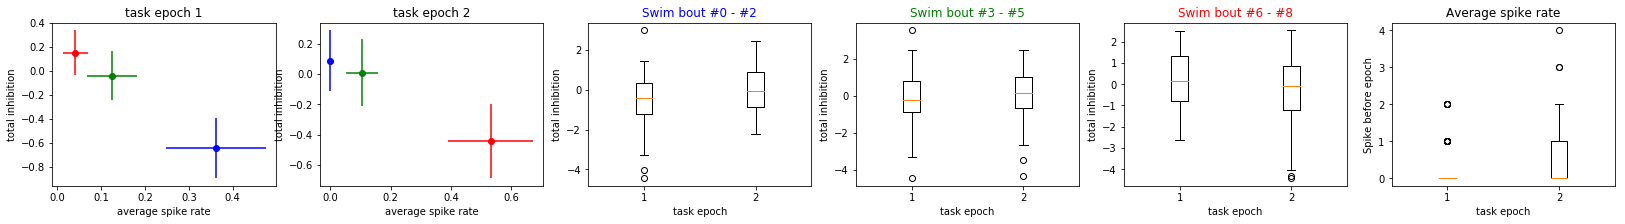

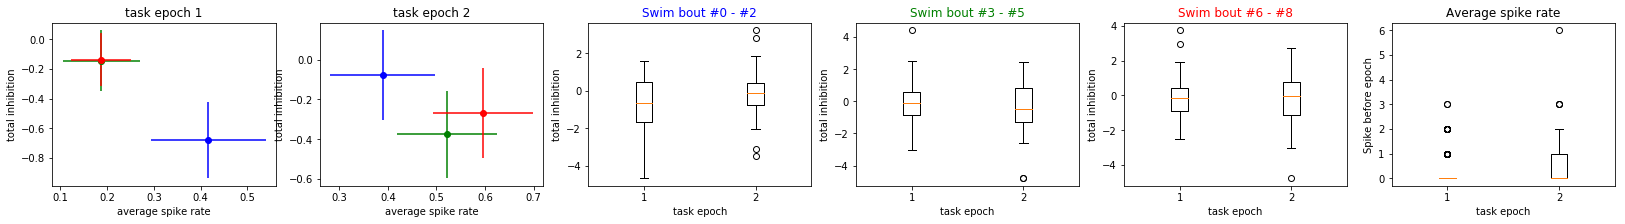

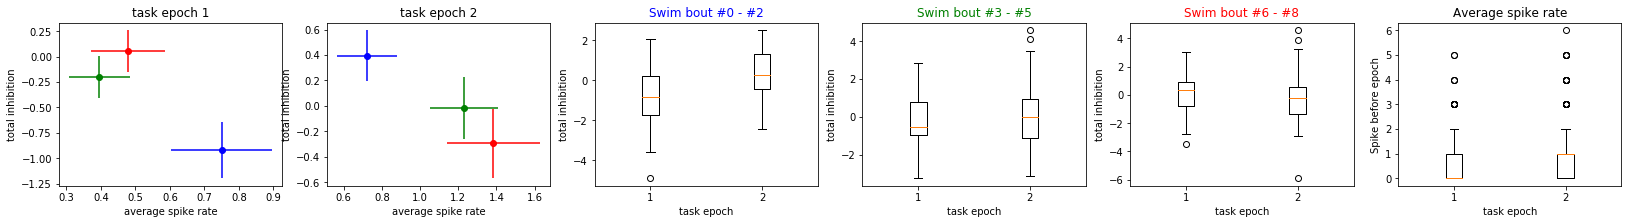

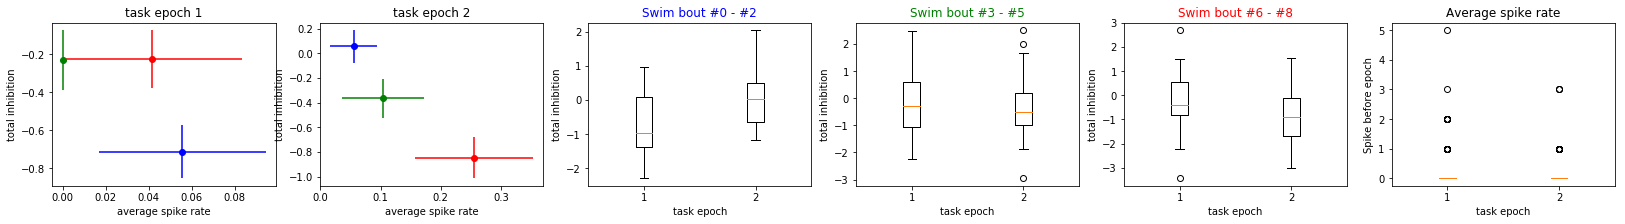

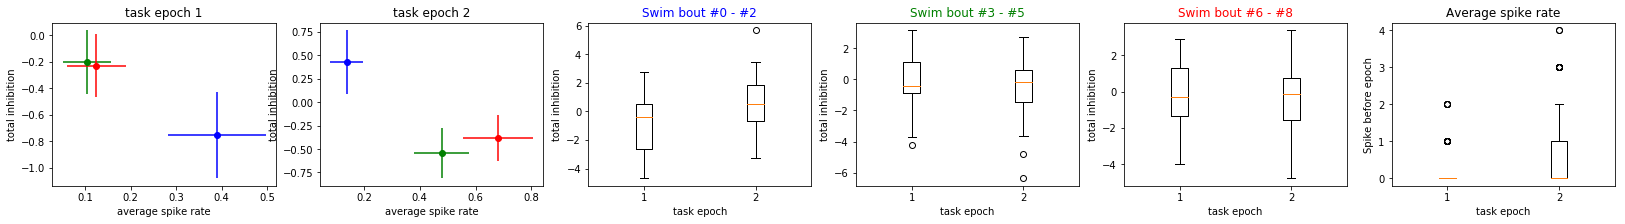

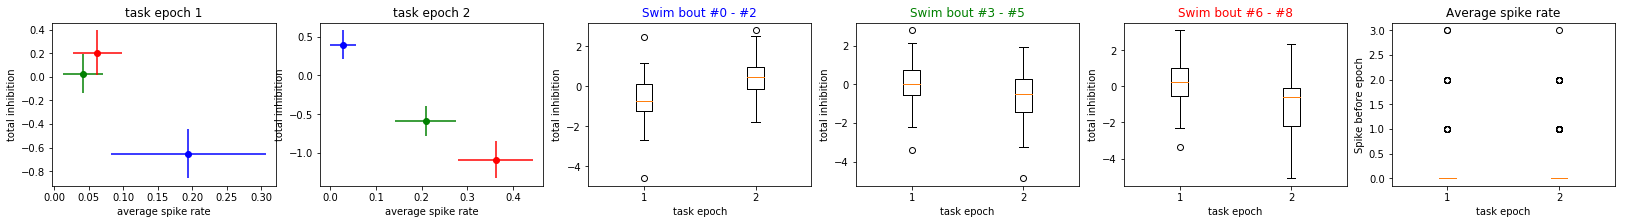

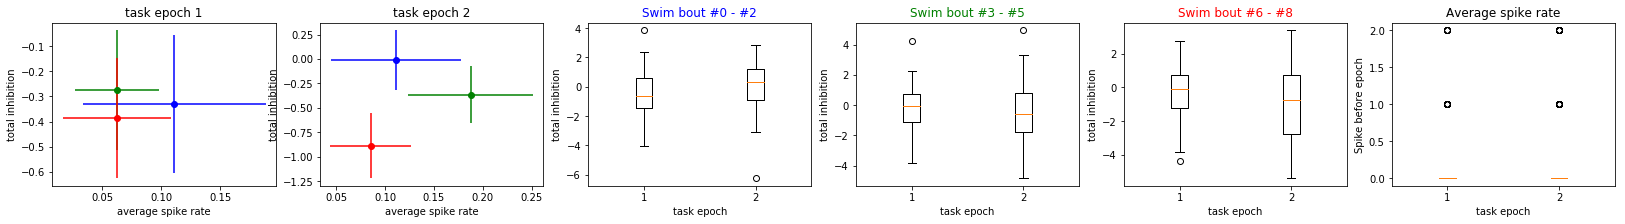

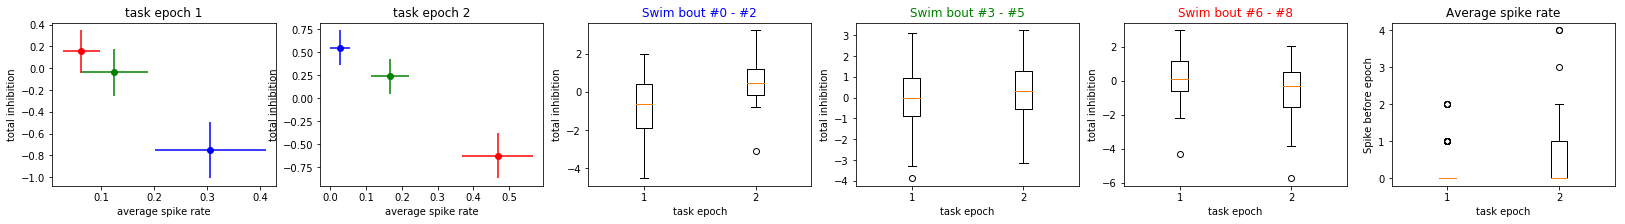

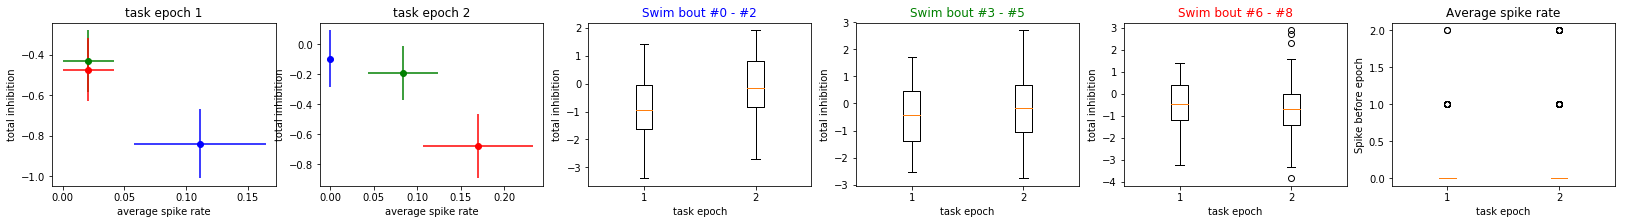

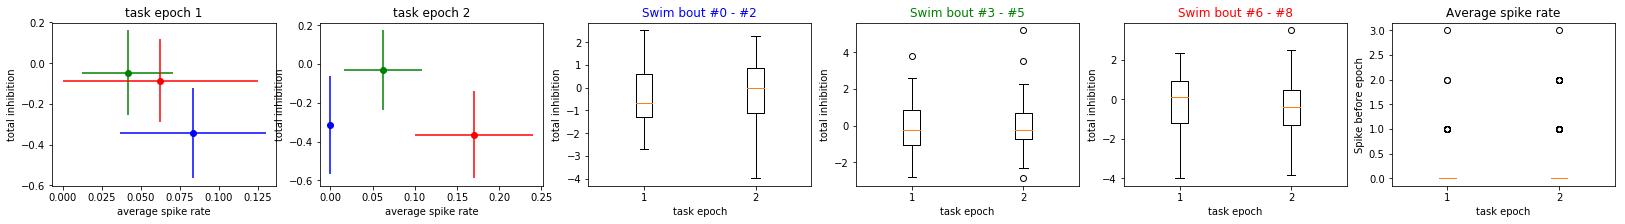

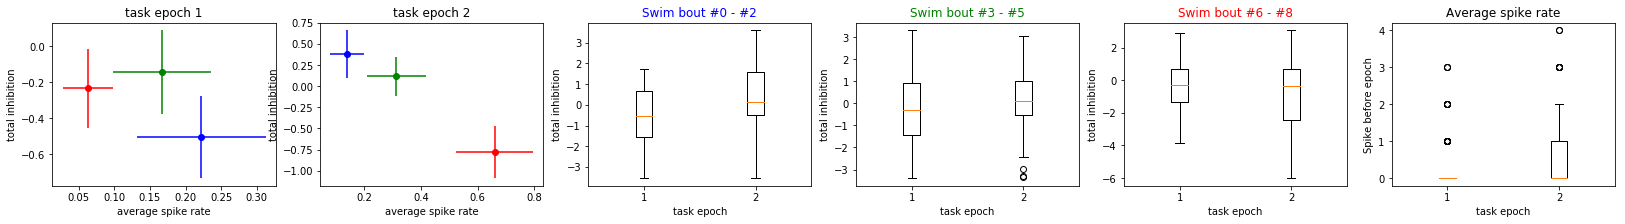

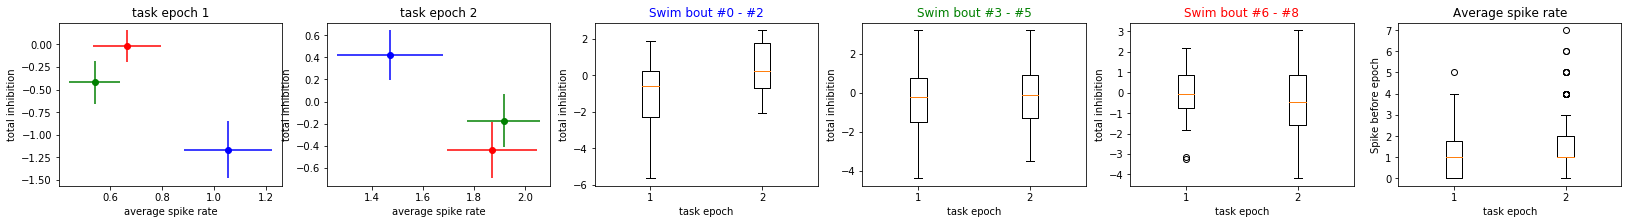

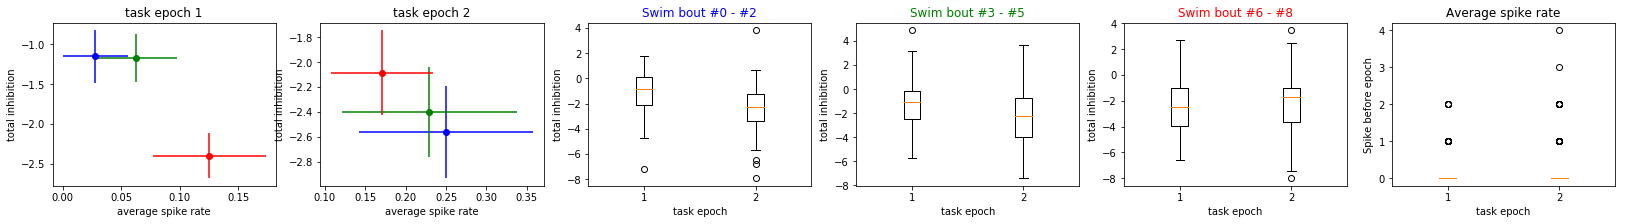

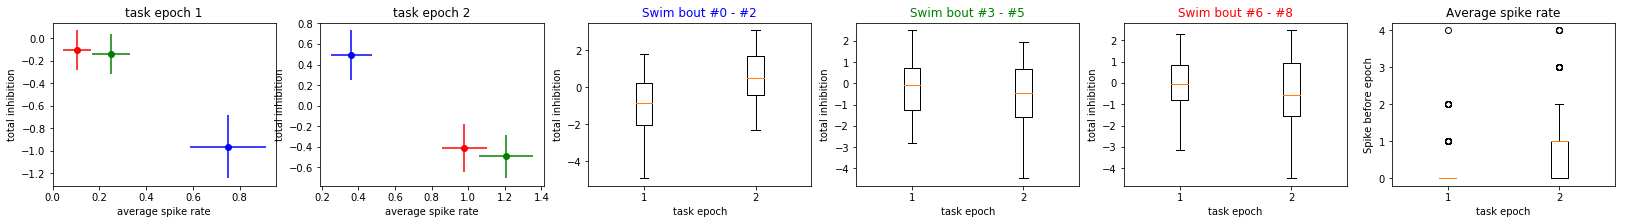

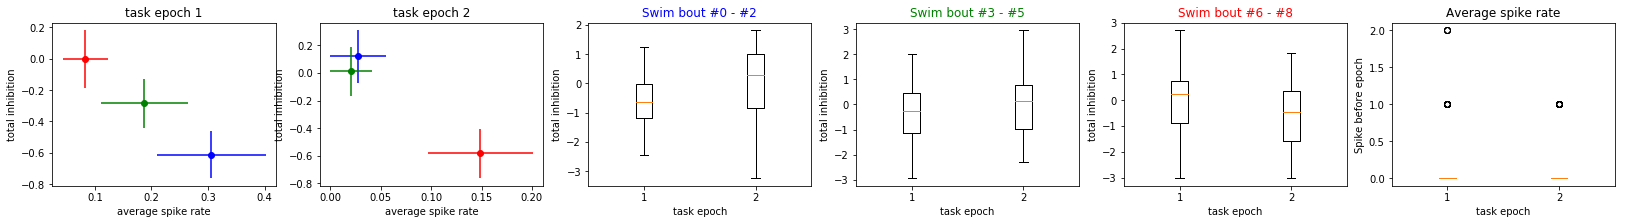

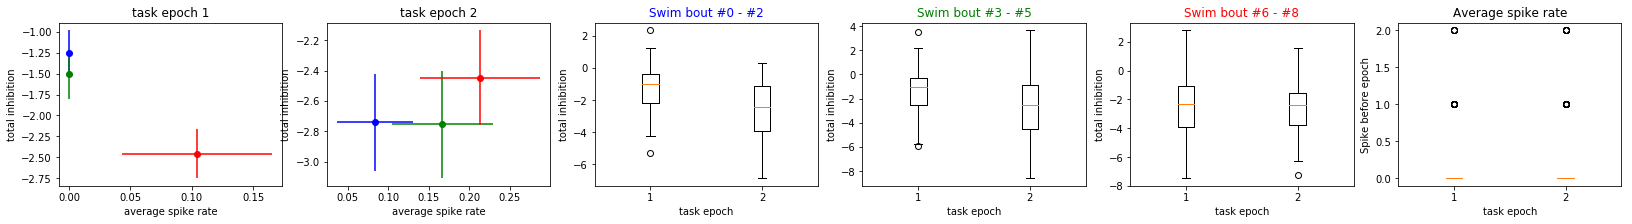

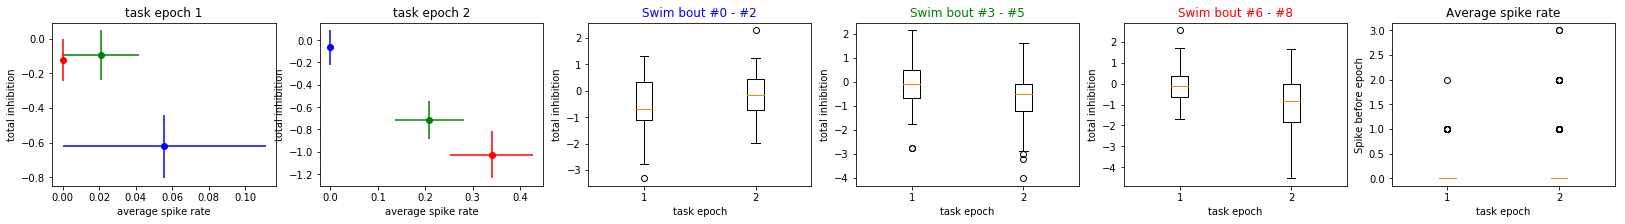

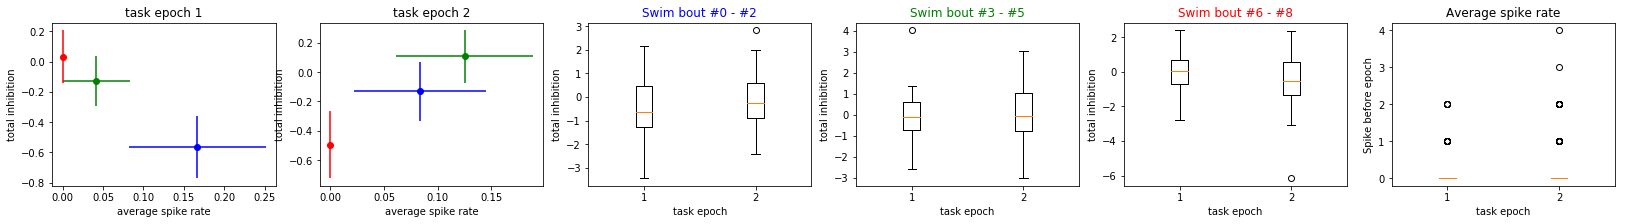

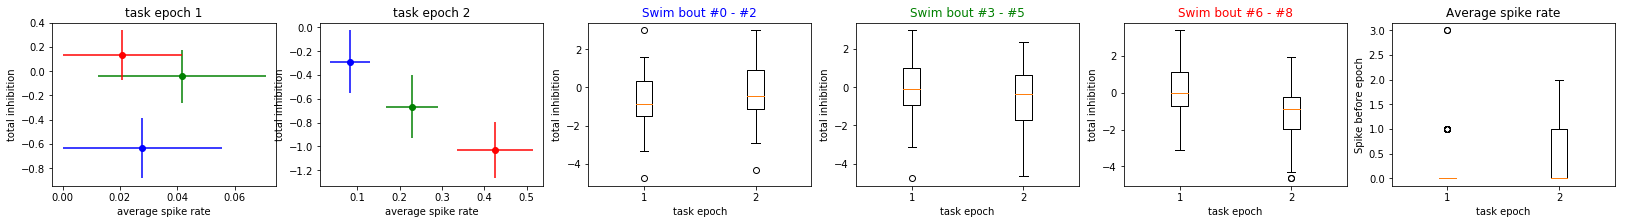

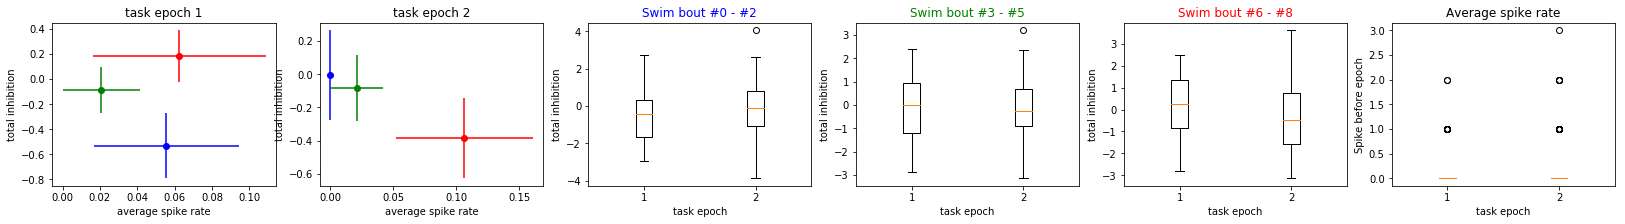

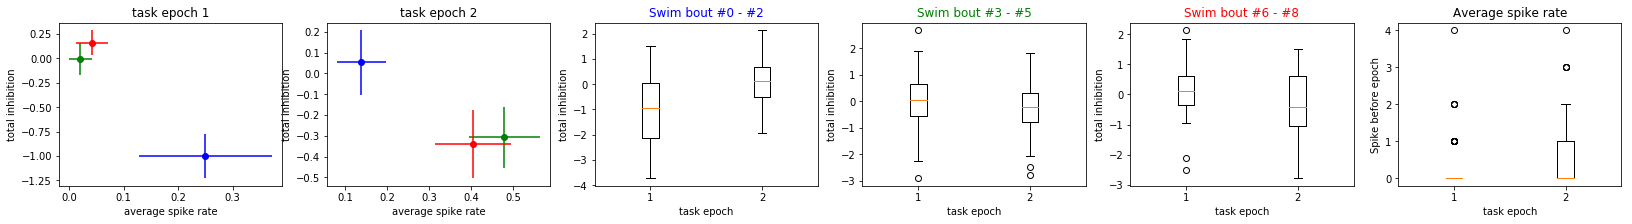

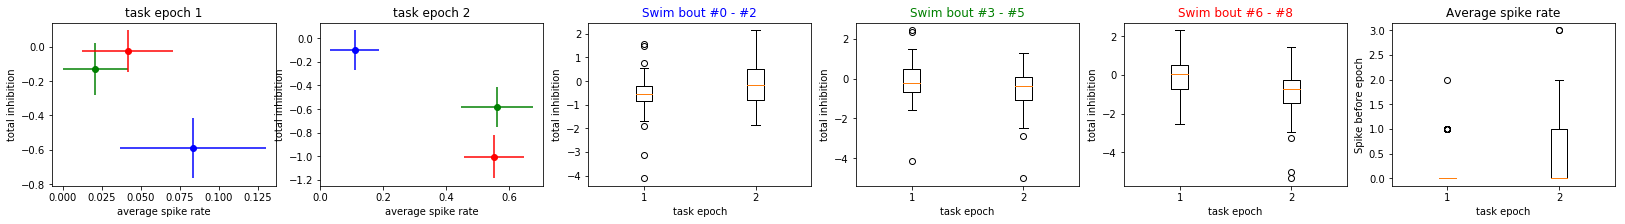

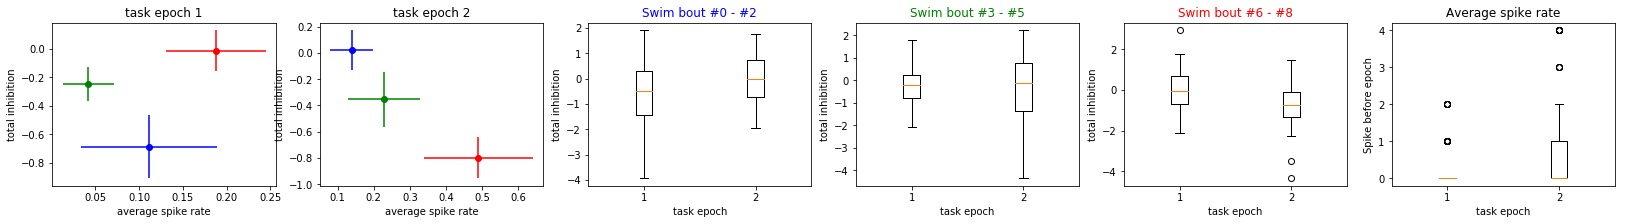

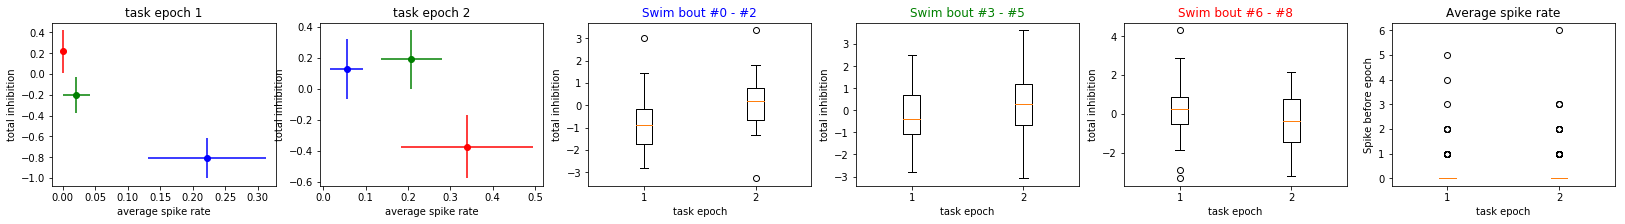

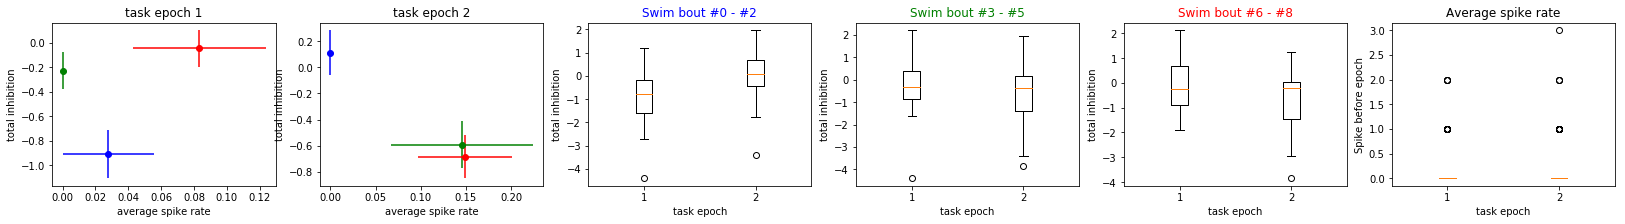

In [5]:
_, _ = mean_spk_sub(dat_xls_file.iloc[0], isplot=True)

In [6]:
spk_list = []
sub_list = []
for _, row in dat_xls_file.iterrows():
    spk, sub = mean_spk_sub(row)
    spk_list.append(spk)
    sub_list.append(sub)

Processing 03152018 Fish1-1
Processing 03152018 Fish4-1
Processing 03152018 Fish4-2
Processing 04052018 Fish4-1
Processing 04052018 Fish4-2
Processing 04122018 Fish2-1
Processing 04122018 Fish2-2
Processing 04122018 Fish4-1
Processing 04192018 Fish1-1
Processing 04192018 Fish1-2
Processing 04192018 Fish2-2
Processing 07262018 Fish2-1
Processing 07262018 Fish2-2
Processing 10182018 Fish3-1
Processing 11222018 Fish1-1


/groups/ahrens/home/weiz/Projects/DRN_voltage_analysis/Notebooks/activity_swim_bout.py:72: RuntimeWarning: Mean of empty slice.
  ave_resp_spk[i,n_]  = spk[c,ss_:se_].mean()*300
/groups/ahrens/home/weiz/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/groups/ahrens/home/weiz/Projects/DRN_voltage_analysis/Notebooks/activity_swim_bout.py:87: RuntimeWarning: Mean of empty slice.
  spk_bout_list[c, n_period-1, 1] = mean_spk[((task_period==n_period) & (swim_count<=6) & (swim_count>=3))].mean()
/groups/ahrens/home/weiz/Projects/DRN_voltage_analysis/Notebooks/activity_swim_bout.py:88: RuntimeWarning: Mean of empty slice.
  sub_bout_list[c, n_period-1, 1] = val_to_plot[((task_period==n_period) & (swim_count<=6) & (swim_count>=3))].mean()
/groups/ahrens/home/weiz/Projects/DRN_voltage_analysis/Notebooks/activity_swim_bout.py:89: RuntimeWarning: Mean of empty slice.
  spk_bout_list[c, 

Processing 11222018 Fish1-2
Processing 11222018 Fish1-3


/groups/ahrens/home/weiz/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 8 results
  r = func(a, **kwargs)


Processing 11222018 Fish2-1
Processing 11222018 Fish2-2
Processing 12202018 Fish3-2


In [7]:
task = []
for _, row in dat_xls_file.iterrows():
    task.append(row['task'][0])

In [13]:
from itertools import compress
task_R = [_=='R' for _ in task]
spk_list_R = list(compress(spk_list, task_R))
sub_list_R = list(compress(sub_list, task_R))

In [15]:
spk_list_R = np.concatenate(spk_list_R)
sub_list_R = np.concatenate(sub_list_R)

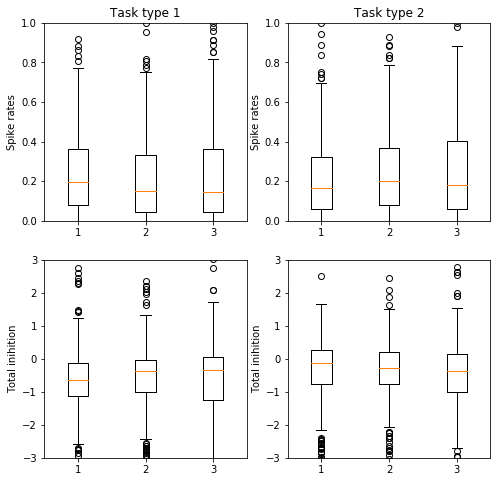

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for n_trial in range(2):
    spk_ = spk_list_R[:, n_trial, :]
    sub_ = sub_list_R[:, n_trial, :]
    ax[0, n_trial].boxplot(spk_)
    ax[1, n_trial].boxplot(sub_)
    ax[0, n_trial].set_title('Task type %d'%(n_trial+1))
    ax[0, n_trial].set_ylabel('Spike rates')
    ax[1, n_trial].set_ylabel('Total inihition')
    ax[0, n_trial].set_ylim([0, 1])
    ax[1, n_trial].set_ylim([-3, 3])

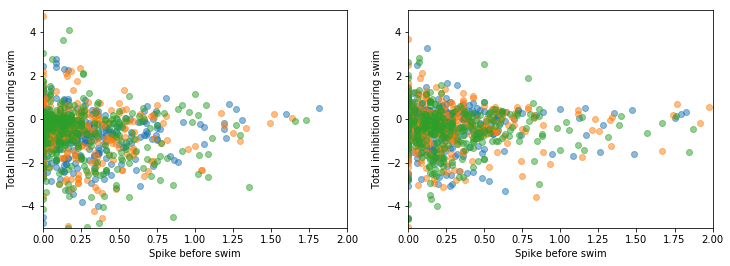

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for n_trial in range(2):
    for n_bout in range(3):
        spk_ = spk_list_R[:, n_trial, n_bout]
        sub_ = sub_list_R[:, n_trial, n_bout]
        ax[n_trial].plot(spk_, sub_, 'o', alpha=0.5)
        ax[n_trial].set_xlabel('Spike before swim')
        ax[n_trial].set_ylabel('Total inhibition during swim')
        ax[n_trial].set_xlim([0, 2])
        ax[n_trial].set_ylim([-5, 5])

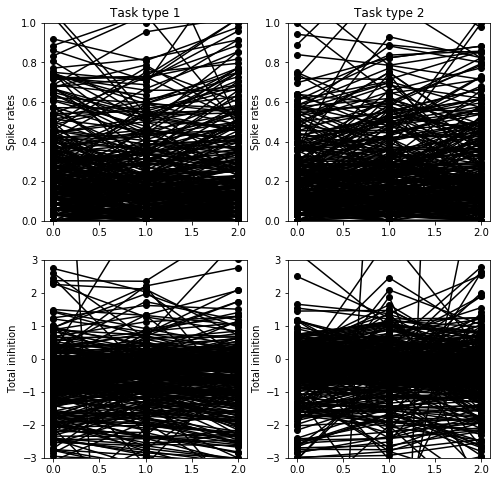

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for n_trial in range(2):
    spk_ = spk_list_R[:, n_trial, :]
    sub_ = sub_list_R[:, n_trial, :]
    ax[0, n_trial].plot(spk_.T, '-ok')
    ax[1, n_trial].plot(sub_.T, '-ok')
    ax[0, n_trial].set_title('Task type %d'%(n_trial+1))
    ax[0, n_trial].set_ylabel('Spike rates')
    ax[1, n_trial].set_ylabel('Total inihition')
    ax[0, n_trial].set_ylim([0, 1])
    ax[1, n_trial].set_ylim([-3, 3])

In [40]:
spk_ = spk_list_R[:, 1, :]
rank_neuron = (spk_[:, 0]<=spk_[:, 1]) & (spk_[:, 1]<=spk_[:, 2])

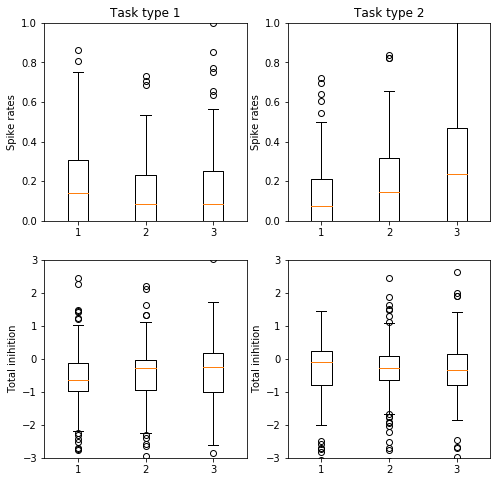

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for n_trial in range(2):
    spk_ = spk_list_R[rank_neuron, n_trial, :]
    sub_ = sub_list_R[rank_neuron, n_trial, :]
    ax[0, n_trial].boxplot(spk_)
    ax[1, n_trial].boxplot(sub_)
    ax[0, n_trial].set_title('Task type %d'%(n_trial+1))
    ax[0, n_trial].set_ylabel('Spike rates')
    ax[1, n_trial].set_ylabel('Total inihition')
    ax[0, n_trial].set_ylim([0, 1])
    ax[1, n_trial].set_ylim([-3, 3])

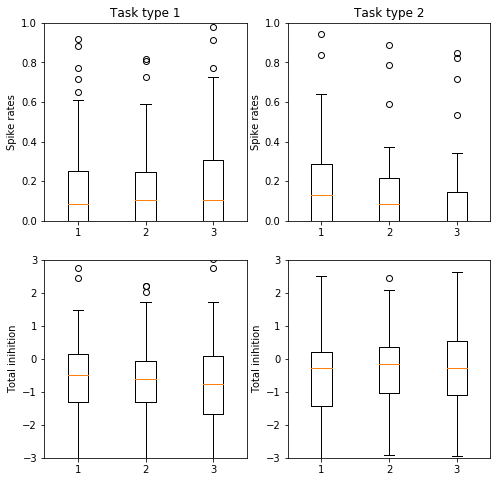

In [49]:
spk_ = spk_list_R[:, 1, :]
rank_neuron = (spk_[:, 0]>=spk_[:, 1]) & (spk_[:, 1]>=spk_[:, 2])
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for n_trial in range(2):
    spk_ = spk_list_R[rank_neuron, n_trial, :]
    sub_ = sub_list_R[rank_neuron, n_trial, :]
    ax[0, n_trial].boxplot(spk_)
    ax[1, n_trial].boxplot(sub_)
    ax[0, n_trial].set_title('Task type %d'%(n_trial+1))
    ax[0, n_trial].set_ylabel('Spike rates')
    ax[1, n_trial].set_ylabel('Total inihition')
    ax[0, n_trial].set_ylim([0, 1])
    ax[1, n_trial].set_ylim([-3, 3])

In [46]:
rank_neuron = (spk_[:, 0]>=spk_[:, 1]) & (spk_[:, 1]>=spk_[:, 2])

33

/groups/ahrens/home/weiz/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/groups/ahrens/home/weiz/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/groups/ahrens/home/weiz/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/groups/ahrens/home/weiz/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/groups/ahrens/home/weiz/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


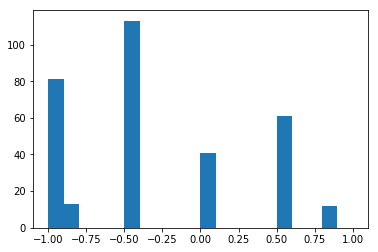

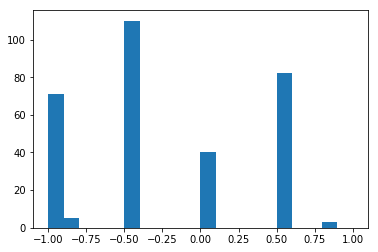

In [63]:
from scipy.stats import spearmanr
num_cell = spk_list_R.shape[0]
rho_list = np.zeros(num_cell)
for n_trial in range(2):
    for n_cell in range(num_cell):
        rho_list[n_cell], _ = spearmanr(spk_list_R[n_cell, n_trial, :], sub_list_R[n_cell, n_trial, :])
    rho_list[np.isnan(rho_list)]=0
    plt.hist(rho_list, bins=np.arange(-1, 1.1, 0.1))
    plt.show()

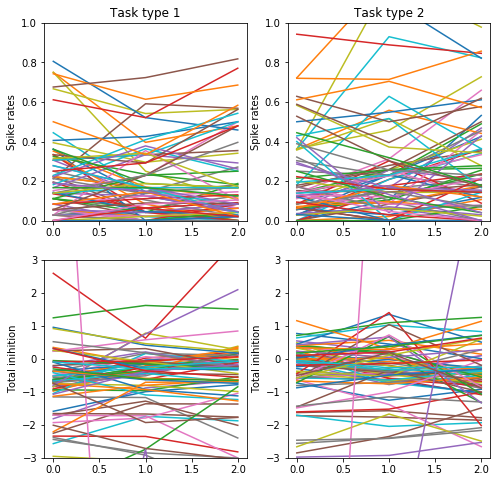

In [67]:
rank_neuron = rho_list<-0.75
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for n_trial in range(2):
    spk_ = spk_list_R[rank_neuron, n_trial, :]
    sub_ = sub_list_R[rank_neuron, n_trial, :]
    ax[0, n_trial].plot(spk_.T)
    ax[1, n_trial].plot(sub_.T)
    ax[0, n_trial].set_title('Task type %d'%(n_trial+1))
    ax[0, n_trial].set_ylabel('Spike rates')
    ax[1, n_trial].set_ylabel('Total inihition')
    ax[0, n_trial].set_ylim([0, 1])
    ax[1, n_trial].set_ylim([-3, 3])

In [60]:
np.arange(-1, 1.5, 0.1)

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00])

## Test neuron if modulated by gain